Import Library

In [1147]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1148]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1149]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1150]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1151]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1152]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1153]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, LeakyReLU, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from tensorflow.keras.regularizers import l2

import tensorflow as tf

Data Wrangling

In [1154]:
data = pd.read_csv('C:/JN/Car_Damage-Detection_Identification_Assignment/input/car-damage-assessment/data.csv')
data.head()

,Unnamed: 0,image,classes,damage_cause
0,0,image/0.jpeg,unknown,unknown
1,1,image/1.jpeg,head_lamp,collision_front
2,2,image/2.jpeg,door_scratch,vandalism
3,3,image/3.jpeg,head_lamp,collision_front
4,4,image/4.jpeg,unknown,unknown


In [1155]:
data.drop(['Unnamed: 0'], inplace = True, axis = 1)

Assessing Data

In [1156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         1594 non-null   object
 1   classes       1594 non-null   object
 2   damage_cause  1594 non-null   object
dtypes: object(3)
memory usage: 37.5+ KB


In [1157]:
df = data.copy()
df.head()

,image,classes,damage_cause
0,image/0.jpeg,unknown,unknown
1,image/1.jpeg,head_lamp,collision_front
2,image/2.jpeg,door_scratch,vandalism
3,image/3.jpeg,head_lamp,collision_front
4,image/4.jpeg,unknown,unknown


Cleaning Data

In [1158]:
df_filtered = df[df["classes"] != "unknown"]

for img_path in df[df["classes"] == "unknown"]["image"]:
    if os.path.exists(img_path): 
        os.remove(img_path)

df_filtered.to_csv("data.csv", index=False)

print("Cleaned! Rows and images with class 'unknown' have been removed.")

Cleaned! Rows and images with class 'unknown' have been removed.


In [1159]:
data.isnull().sum()

image           0
classes         0
damage_cause    0
dtype: int64

Visualization & Explanatory Data Analysis

In [1160]:
label_mapping = {
    'door_dent': 'Dent on the door detected',
    'bumper_dent': 'Dent on the bumper detected',
    'door_scratch': ' Scratch on the door detected',
    'bumper_scratch': 'Scratch on the bumper detected',
    'glass_shatter': 'Broken glass detected',
    'tail_lamp': 'Broken tail light detected',
    'head_lamp': 'Broken head light detected'
}
df_filtered['classes'] = df_filtered['classes'].map(label_mapping)

C:\Users\User\AppData\Local\Temp\ipykernel_28660\1685205789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['classes'] = df_filtered['classes'].map(label_mapping)


In [1161]:
cause_mapping = {
    'vandalism': 'Vandalism damage detected',
    'door_ding': 'Door ding damage detected', 
    'break_in': 'Break in damage detected',
    'collision_front': 'Collision damage detected',
    'collision_rear': 'Collision damage detected',
    'collision_minor': 'Minor collision damage detected',
    'unknown': 'Unknown cause damage detected'
}

df_filtered['damage_cause'] = df_filtered['damage_cause'].map(cause_mapping)

C:\Users\User\AppData\Local\Temp\ipykernel_28660\3306807130.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['damage_cause'] = df_filtered['damage_cause'].map(cause_mapping)


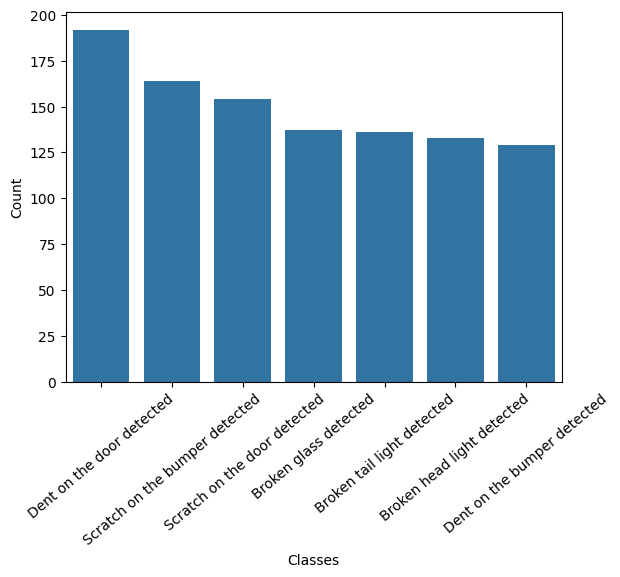

In [1162]:
counts = df_filtered['classes'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=40);

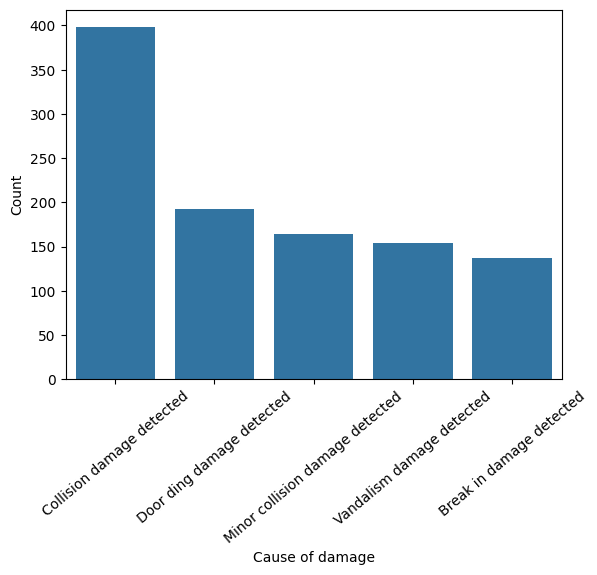

In [1163]:
counts = df_filtered['damage_cause'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Cause of damage')
plt.ylabel('Count')
plt.xticks(rotation=40);

In [1164]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 1 to 1593
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         1045 non-null   object
 1   classes       1045 non-null   object
 2   damage_cause  1045 non-null   object
dtypes: object(3)
memory usage: 32.7+ KB


In [1165]:
path = 'C:/JN/Car_Damage-Detection_Identification_Assignment/input/car-damage-assessment/'
def edit_path_img(x):
    return path + x
    
df_filtered["image"] = df_filtered["image"].apply(edit_path_img)
df_filtered.head()

C:\Users\User\AppData\Local\Temp\ipykernel_28660\1930414836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["image"] = df_filtered["image"].apply(edit_path_img)


,image,classes,damage_cause
1,C:/JN/Car_Damage-Detection_Identification_Assi...,Broken head light detected,Collision damage detected
2,C:/JN/Car_Damage-Detection_Identification_Assi...,Scratch on the door detected,Vandalism damage detected
3,C:/JN/Car_Damage-Detection_Identification_Assi...,Broken head light detected,Collision damage detected
6,C:/JN/Car_Damage-Detection_Identification_Assi...,Broken glass detected,Break in damage detected
8,C:/JN/Car_Damage-Detection_Identification_Assi...,Broken tail light detected,Collision damage detected


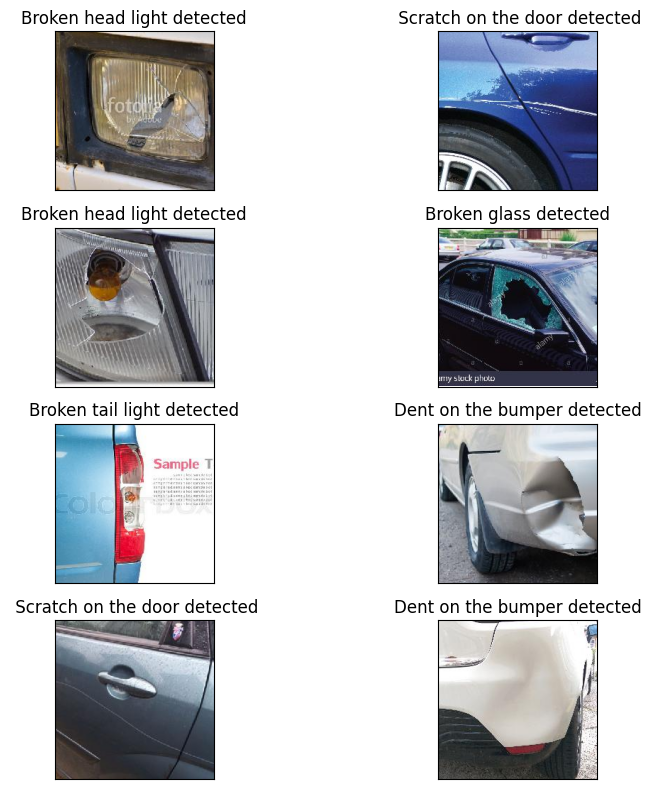

In [1166]:
df_filtered = df_filtered.reset_index(drop=True)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < len(df_filtered): 
        ax.imshow(plt.imread(df_filtered.image[i]))
        ax.set_title(df_filtered.classes[i])

plt.tight_layout()
plt.show()

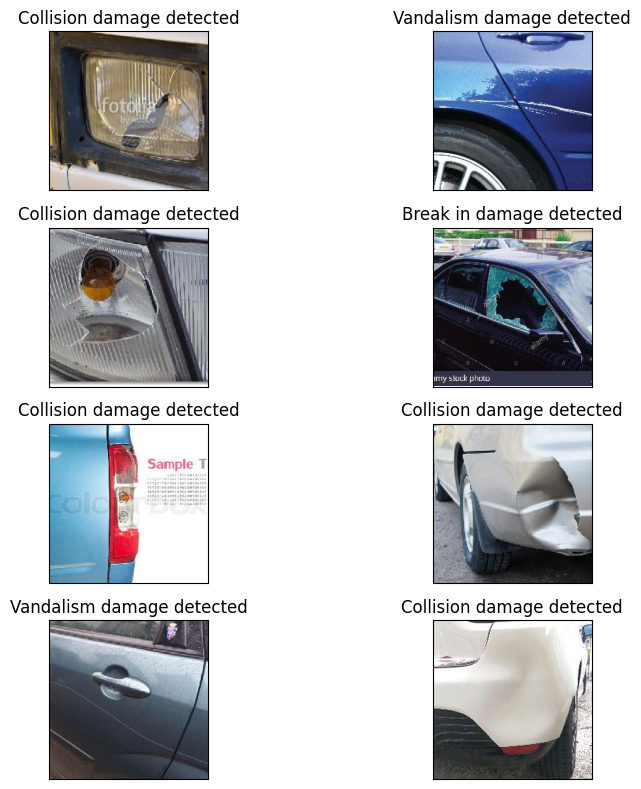

In [1167]:
df_filtered = df_filtered.reset_index(drop=True)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < len(df_filtered): 
        ax.imshow(plt.imread(df_filtered.image[i]))
        ax.set_title(df_filtered.damage_cause[i])

plt.tight_layout()
plt.show()

Data Preparation

In [1168]:
train_df, test_df = train_test_split(df_filtered, test_size=0.2)

In [1169]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [1170]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=0
)

val_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=0
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 836 validated image filenames belonging to 7 classes.
Found 836 validated image filenames belonging to 7 classes.
Found 209 validated image filenames belonging to 7 classes.


In [1171]:
train_datagen_for_cnn = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [1172]:
train_gen_for_cnn = train_datagen_for_cnn.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=0
)

val_gen_for_cnn = train_datagen_for_cnn.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='classes',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 836 validated image filenames belonging to 7 classes.
Found 836 validated image filenames belonging to 7 classes.


Model Configuration

In [1173]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

class StopAtAccuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            return
        acc = logs.get("accuracy", 0)
        val_acc = logs.get("val_accuracy", 0)

        if acc >= 0.95 and val_acc >= 0.95:
            print(f"\n✅ Accuracy dan Validation Accuracy above ≥95%. Training stopped at epoch {epoch+1}.")
            self.model.stop_training = True

In [1174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [1175]:
def plot_training_history(history, model_name="Model"):
    hist_df = pd.DataFrame(history.history)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.lineplot(data=hist_df[['accuracy', 'val_accuracy']], ax=axs[0])
    axs[0].set_title(f'{model_name} Accuracy')
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(["Train", "Validation"])
    axs[0].grid(True)

    sns.lineplot(data=hist_df[['loss', 'val_loss']], ax=axs[1])
    axs[1].set_title(f'{model_name} Loss')
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(["Train", "Validation"])
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [1176]:


def evaluate_and_visualize_results(model, test_gen, test_df, model_name="Model"):

    results = model.evaluate(test_gen, verbose=0)
    print(f"{model_name} Test Loss: {results[0]:.5f}")
    print(f"{model_name} Test Accuracy: {results[1] * 100:.2f}%")


    pred_probs = model.predict(test_gen)
    y_pred = np.argmax(pred_probs, axis=1)
    
    y_true = test_gen.classes  
    labels = {v: k for k, v in test_gen.class_indices.items()}
    

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
    

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels.values(),
                yticklabels=labels.values())
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 9))
    fig.suptitle(f'{model_name} Sample Predictions', fontsize=14, y=1.02)
    
    for i, ax in enumerate(axes.flat):

        if i < len(test_df):
            img_path = test_df.image.iloc[i]
            true_label = test_df.classes.iloc[i]
            
     
            pred_label_idx = y_pred[i]
            pred_label = labels.get(pred_label_idx, f"Unknown ({pred_label_idx})")
            
            ax.imshow(plt.imread(img_path))
            
          
            is_correct = (true_label == list(test_gen.class_indices.keys())[pred_label_idx])
            color = 'green' if is_correct else 'red'
            
            ax.set_title(f"True: {true_label}\nPred: {pred_label}", 
                        fontsize=10, color=color, pad=8)
            ax.axis('off')
        else:
            ax.axis('off')  
    
    plt.tight_layout()
    plt.show()

In [1177]:
def plot_model_comparison(histories, accuracies, model_names):
 
    train_acc = [max(h.history['accuracy']) for h in histories]
    val_acc = [max(h.history['val_accuracy']) for h in histories]
    
  
    df = pd.DataFrame({
        "Model": model_names,
        "Training": train_acc,
        "Validation": val_acc
    }).set_index("Model")
    

    plt.figure(figsize=(14, 7), dpi=100)
    

    x = np.arange(len(model_names))
    width = 0.25
    
    # Create bars with gradient colors
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, 3))
    
    rects1 = plt.bar(x - width, df['Training'], width, 
                    label='Training', color=colors[0], edgecolor='white', linewidth=1)
    rects2 = plt.bar(x, df['Validation'], width, 
                    label='Validation', color=colors[1], edgecolor='white', linewidth=1)
    
    # Customization
    plt.title('Model Performance Comparison', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Model Architecture', fontsize=12, labelpad=10)
    plt.ylabel('Accuracy', fontsize=12, labelpad=10)
    plt.ylim(0, 1.05)
    plt.xticks(x, model_names, fontsize=10, rotation=15, ha='right')
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    autolabel(rects1)
    autolabel(rects2)
    
    # Legend
    plt.legend(fontsize=10, frameon=True, framealpha=1, 
              bbox_to_anchor=(1, 1), loc='upper left')
    
    # Add watermark
    plt.figtext(0.95, 0.03, 'Car Damage Assessment | Model Benchmark', 
               fontsize=10, color='gray', ha='right', va='bottom', alpha=0.5)
    
    plt.tight_layout()
    plt.show()


In [1178]:
list_comparation_test_acc = []

Model Training

In [ ]:

model_cnn = Sequential()

# Layer 1
model_cnn.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))  

# Layer 2
model_cnn.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.3))  

# Layer 3
model_cnn.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.4))  

# Layer 4
model_cnn.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.4))

# Global Average Pooling
model_cnn.add(GlobalAveragePooling2D())

# Fully Connected Layer
model_cnn.add(Dense(512, kernel_regularizer=l2(0.001)))
model_cnn.add(BatchNormalization())
model_cnn.add(LeakyReLU(alpha=0.1))
model_cnn.add(Dropout(0.5))  

# Output Layer
model_cnn.add(Dense(7, activation='softmax'))


# Compile the model with two loss functions, one for each output
model_cnn.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model_cnn.summary()

# Callbacks
callbacks = [
    StopAtAccuracy(),
]

# Training Model
history_cnn = model_cnn.fit(
    train_gen_for_cnn,
    validation_data=val_gen_for_cnn,
    epochs=500,
    callbacks=callbacks
)


plot_training_history(history_cnn, model_name="Model CNN")
accuracy_cnn = evaluate_and_visualize_results(model_cnn, test_gen, test_df, "CustomCNN")

results_cnn = model_cnn.evaluate(test_gen, verbose=0)

test_accuracy_cnn = results_cnn[1]
list_comparation_test_acc.append(test_accuracy_cnn)

c:\JN\Car_Damage-Detection_Identification_Assignment\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\JN\Car_Damage-Detection_Identification_Assignment\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_196 (Conv2D)             │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_224         │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_224 (LeakyReLU)     │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 112, 112, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_140 (Dropout)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_197 (Conv2D)             │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_225         │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_225 (LeakyReLU)     │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_198 (Conv2D)             │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_226         │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_226 (LeakyReLU)     │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 56, 56, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_141 (Dropout)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_199 (Conv2D)             │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_227         │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_227 (LeakyReLU)     │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_200 (Conv2D)             │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_228         │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_228 (LeakyReLU)     │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 28, 28, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_142 (Dropout)           │ (None, 28, 28, 128)    │             

 Total params: 1,303,943 (4.97 MB)

 Trainable params: 1,301,063 (4.96 MB)

 Non-trainable params: 2,880 (11.25 KB)

c:\JN\Car_Damage-Detection_Identification_Assignment\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500


KeyboardInterrupt: 